In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [19]:
path =r"C:\Users\GAURI TOSHNIWAL\Documents\DARPG Hackathon\Registered_Users.csv"
df = pd.read_csv(path,encoding = 'unicode_escape',low_memory=False)

In [22]:
df.shape

(618968, 8)

In [26]:
df.set_index('User Code',inplace=True)

In [27]:
df.shape

(618968, 7)

In [28]:
df.head()

,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
User Code,,,,,,,
1,India,Delhi,South West Delhi,110022,M,03/11/2017,18:15:15
2,India,Uttarakhand,Dehradun,249201,T,03/11/2017,21:01:32
3,India,Delhi,North Delhi,247667,M,03/11/2017,21:55:22
4,India,Haryana,Hisar,125001,M,03/11/2017,22:20:35
5,India,Delhi,North Delhi,248001,M,04/11/2017,13:31:47


Gender Distribution:

In [29]:
df['Gender'].value_counts()

M    483814
F     66037
m     63803
f      4976
t        27
T         3
Name: Gender, dtype: int64

In [30]:
df['Gender'].replace(to_replace ="m", value ="M",inplace=True) 

In [31]:
df['Gender'].replace(to_replace ="f", value ="F",inplace=True) 

In [32]:
df['Gender'].replace(to_replace ="t", value ="T",inplace=True)

In [33]:
df['Gender'].value_counts()

M    547617
F     71013
T        30
Name: Gender, dtype: int64

Total number of countries present :112     

In [34]:
df['Country'].value_counts()

India                             615583
USA                                 1093
United Arab Emirates                 316
United Kingdom and Northern Ir       220
Canada                               216
Australia                            191
Singapore                            140
Others                               118
Oman                                  72
Saudi Arabia                          66
Germany                               66
Kuwait                                63
Indonesia                             60
Nepal                                 58
Qatar                                 57
Malaysia                              40
New Zealand                           39
Bahrain                               34
France                                33
Japan                                 27
Netherlands                           26
Nigeria                               22
China                                 22
South Africa                          21
Sweden          

Registered Users from every state

In [35]:
df['State Name'].value_counts()

Uttar Pradesh                  101272
Maharashtra                     68331
Delhi                           55810
Karnataka                       53049
Rajasthan                       34507
Haryana                         32261
Gujarat                         31920
West Bengal                     31902
Bihar                           29033
Tamilnadu                       28366
Madhya Pradesh                  25109
Punjab                          14974
Telangana                       13730
Andhra Pradesh                  13248
Odisha                          12986
Jharkhand                       12443
Kerala                          11763
Assam                            9260
Uttarakhand                      8245
Chhattisgarh                     7734
Jammu And Kashmir                5729
Himachal Pradesh                 4268
Chandigarh                       3096
Not Known                        3017
Tripura                          1638
Goa                              1304
Puducherry  

In [36]:
df = df[df['State Name'] != '---Select State---']

In [37]:
df['State Name'].value_counts()

Uttar Pradesh                  101272
Maharashtra                     68331
Delhi                           55810
Karnataka                       53049
Rajasthan                       34507
Haryana                         32261
Gujarat                         31920
West Bengal                     31902
Bihar                           29033
Tamilnadu                       28366
Madhya Pradesh                  25109
Punjab                          14974
Telangana                       13730
Andhra Pradesh                  13248
Odisha                          12986
Jharkhand                       12443
Kerala                          11763
Assam                            9260
Uttarakhand                      8245
Chhattisgarh                     7734
Jammu And Kashmir                5729
Himachal Pradesh                 4268
Chandigarh                       3096
Not Known                        3017
Tripura                          1638
Goa                              1304
Puducherry  

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618968 entries, 0 to 618967
Data columns (total 8 columns):
User Code               618968 non-null int64
Country                 618968 non-null object
State Name              618599 non-null object
District Name           618803 non-null object
Pin                     591863 non-null object
Gender                  618660 non-null object
Date of Registration    618968 non-null object
Time of Registration    618968 non-null object
dtypes: int64(1), object(7)
memory usage: 37.8+ MB


In [38]:
df.tail()

,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
User Code,,,,,,,
629937,India,Andhra Pradesh,Visakhapatnam,530018,F,24/10/2019,16:54:24
629938,India,Delhi,New Delhi,110092,M,24/10/2019,16:59:51
629939,India,Jharkhand,Gumla,835207,M,24/10/2019,17:00:40
629940,India,Maharashtra,Mumbai City,400018,F,24/10/2019,17:01:30
629941,India,West Bengal,North 24 Parganas,700056,F,24/10/2019,17:05:58


In [39]:
df.shape

(618965, 7)

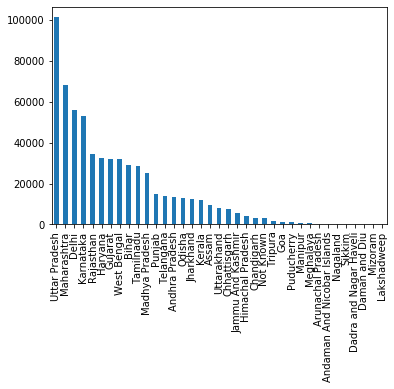

In [40]:
df['State Name'].value_counts().plot.bar()

In [44]:
df['New Date of Registration'] = pd.to_datetime(df['Date of Registration'])

In [43]:
df.dtypes

Country                             object
State Name                          object
District Name                       object
Pin                                 object
Gender                              object
Date of Registration                object
Time of Registration                object
New Date of Registration    datetime64[ns]
dtype: object

In [45]:
df['Year'] = df['New Date of Registration'].dt.year

Number of users registered as per year

In [46]:
df['Year'].value_counts()

2018    315643
2019    295819
2017      7503
Name: Year, dtype: int64

In [47]:
df['Month'] = df['New Date of Registration'].dt.month

Number of users registered as per year

In [48]:
df['Month'].value_counts()

6     67692
7     62561
9     59077
8     56948
1     55153
3     54363
5     51620
2     47109
4     46807
10    43456
11    38687
12    35492
Name: Month, dtype: int64

In [49]:
df.drop('Pin',axis = 1,inplace = True)

In [50]:
df.drop('Date of Registration',axis=1,inplace=True)

In [51]:
df.head()

,Country,State Name,District Name,Gender,Time of Registration,New Date of Registration,Year,Month
User Code,,,,,,,,
1,India,Delhi,South West Delhi,M,18:15:15,2017-03-11,2017,3
2,India,Uttarakhand,Dehradun,T,21:01:32,2017-03-11,2017,3
3,India,Delhi,North Delhi,M,21:55:22,2017-03-11,2017,3
4,India,Haryana,Hisar,M,22:20:35,2017-03-11,2017,3
5,India,Delhi,North Delhi,M,13:31:47,2017-04-11,2017,4
